# **Data Pipeline HubSpot Technical Test Phase II - Oscar Romero**
## 1. Create a library, in which the following functions can be called:

Cargamos todas las librerías

In [1]:
import pandas as pd
import requests
import re
import HubSpotLibrary as hsl
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
api_key='pat-na1-3c7b0af9-bb66-40e7-a256-ce4c5eb27e81'
api_key2='pat-na1-48356796-9786-4686-a653-8152ee8f429e'

### Extraction Functions:
    Contact collection: Usamos la librería que creamos para extraer los contactos y los guardamos en el archivo Extraction.csv

In [3]:
contacts=hsl.contacts(api_key)
df=pd.DataFrame(contacts)
df.to_csv('Extraction.csv', index=False)
df.head()

,firstname,lastname,raw_email,country,phone,technical_test___create_date,industry,address,hs_object_id
0,Zoe,Owen,Zoe <zoe_owen450104633@acrit.org> Contact Info.,Waterford,0-774-386-624,2021-07-13,Poultry and fish,"Blackpool Rue, 6576",416102
1,Zara,Rodwell,Zara <zara_rodwell1398442854@nickia.com> Conta...,Ireland,6-777-367-783,2021-01-09,Fruit and vegetables,"Parkfield Avenue, 5340",413403
2,Zara,Freeburn,Zara <zara_freeburn1593147546@gmail.com> Conta...,Ireland,5-618-556-540,2021-08-30,Milling,"Abourne Lane, 876",417951
3,Winnie,Walter,Winnie <winnie_walter538064895@sheye.org> Cont...,Dublin,1-161-604-327,2021-02-10,Dairy products,"Chester Crossroad, 7070",419852
4,Zoe,Owen,Zoe <zoe_owen1652446013@bungar.biz> Contact Info.,Dublin,5-645-416-200,2021-11-02,Meat,"Tilloch Crossroad, 8332",425352


### Transformation functions:

    Usamos value_counts() para hallar los valores que se encuentran en Country 

In [4]:
df['country'].value_counts()

country
Waterford        677
Limerick         663
Dublin           627
Plymouth         626
Milton Keynes    623
Oxford           620
Cork             620
Ireland          617
England          607
London           601
Winchester       572
Name: count, dtype: int64

    Country Recognition: Llamamos la función que creamos en nuestra librería y guardamos la información de cada entrada, en ciudad y pais respectivamente

In [5]:
ciudades=[]
paises=[]
for x in df['country']:
    pareja=hsl.cityorcountry(x)
    paises.append(pareja[0])
    ciudades.append(pareja[1])

    Found Emails: Llamamos la función que creamos en nuestra librearía y guardamos la información de cada entrada en email

In [6]:
email=[]
for x in df['raw_email']:
    email.append(hsl.emailidentifier(x))

Agregamos lo que hemos desarrollado a nuestro DataFrame

In [7]:
df['pais']=paises
df['ciudad']=ciudades
df['email']=email
df.head()

,firstname,lastname,raw_email,country,phone,technical_test___create_date,industry,address,hs_object_id,pais,ciudad,email
0,Zoe,Owen,Zoe <zoe_owen450104633@acrit.org> Contact Info.,Waterford,0-774-386-624,2021-07-13,Poultry and fish,"Blackpool Rue, 6576",416102,Ireland,Waterford,zoe_owen450104633@acrit.org
1,Zara,Rodwell,Zara <zara_rodwell1398442854@nickia.com> Conta...,Ireland,6-777-367-783,2021-01-09,Fruit and vegetables,"Parkfield Avenue, 5340",413403,Ireland,,zara_rodwell1398442854@nickia.com
2,Zara,Freeburn,Zara <zara_freeburn1593147546@gmail.com> Conta...,Ireland,5-618-556-540,2021-08-30,Milling,"Abourne Lane, 876",417951,Ireland,,zara_freeburn1593147546@gmail.com
3,Winnie,Walter,Winnie <winnie_walter538064895@sheye.org> Cont...,Dublin,1-161-604-327,2021-02-10,Dairy products,"Chester Crossroad, 7070",419852,Ireland,Dublin,winnie_walter538064895@sheye.org
4,Zoe,Owen,Zoe <zoe_owen1652446013@bungar.biz> Contact Info.,Dublin,5-645-416-200,2021-11-02,Meat,"Tilloch Crossroad, 8332",425352,Ireland,Dublin,zoe_owen1652446013@bungar.biz


    Fix Phone Numbers: Usamos la funcion que creamos en nuestra librería para procesar los números de teléfono y guardamos la información

In [8]:
linea=0
telefonos=[]
for x in df['phone']:
    telefonos.append(hsl.phonecorrection(x,df['pais'][linea]))
    linea+=1

In [9]:
df['telefono']=telefonos
df.head()

,firstname,lastname,raw_email,country,phone,technical_test___create_date,industry,address,hs_object_id,pais,ciudad,email,telefono
0,Zoe,Owen,Zoe <zoe_owen450104633@acrit.org> Contact Info.,Waterford,0-774-386-624,2021-07-13,Poultry and fish,"Blackpool Rue, 6576",416102,Ireland,Waterford,zoe_owen450104633@acrit.org,(+353) 7743 86624
1,Zara,Rodwell,Zara <zara_rodwell1398442854@nickia.com> Conta...,Ireland,6-777-367-783,2021-01-09,Fruit and vegetables,"Parkfield Avenue, 5340",413403,Ireland,,zara_rodwell1398442854@nickia.com,(+353) 6777 367783
2,Zara,Freeburn,Zara <zara_freeburn1593147546@gmail.com> Conta...,Ireland,5-618-556-540,2021-08-30,Milling,"Abourne Lane, 876",417951,Ireland,,zara_freeburn1593147546@gmail.com,(+353) 5618 556540
3,Winnie,Walter,Winnie <winnie_walter538064895@sheye.org> Cont...,Dublin,1-161-604-327,2021-02-10,Dairy products,"Chester Crossroad, 7070",419852,Ireland,Dublin,winnie_walter538064895@sheye.org,(+353) 1161 604327
4,Zoe,Owen,Zoe <zoe_owen1652446013@bungar.biz> Contact Info.,Dublin,5-645-416-200,2021-11-02,Meat,"Tilloch Crossroad, 8332",425352,Ireland,Dublin,zoe_owen1652446013@bungar.biz,(+353) 5645 416200


    Exportamos el archivo en formato csv

In [10]:
df.to_csv('Transformation.csv', index=False)

## 2. Generate an interactive graphic(s)
    Gráfica que muestra la cantidad de personas vs la industria en la que se encuentran

In [11]:
cantidad=df['industry'].value_counts()
info=cantidad.reset_index()
info.columns=['industry','count']

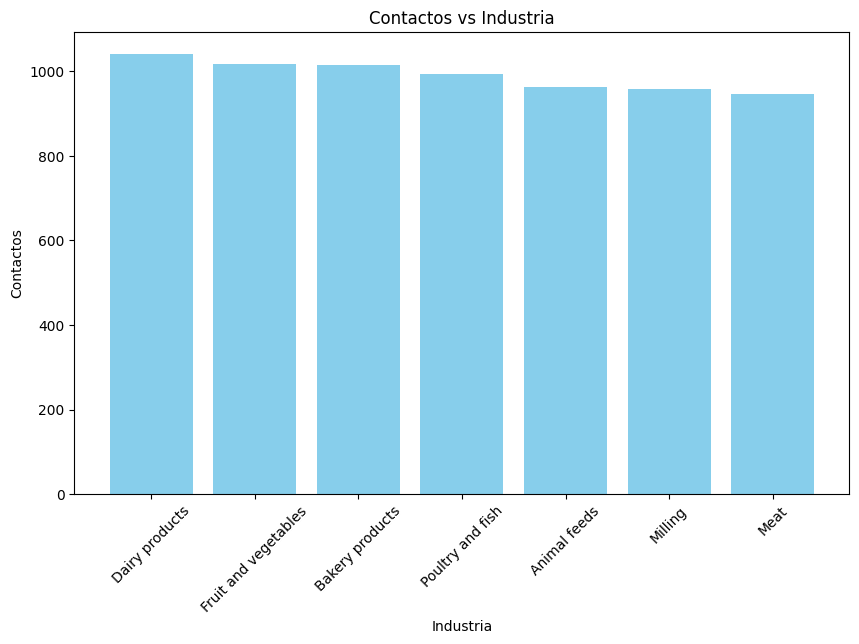

In [12]:
plt.figure(figsize=(10,6))
plt.bar(info['industry'], info['count'], color='skyblue')

plt.xlabel('Industria')
plt.ylabel('Contactos')
plt.title('Contactos vs Industria')
plt.xticks(rotation=45)
plt.show()

    Gráfica que muestra la cantidad de personas vs el país de residencía

In [13]:
cantidadpais=df['pais'].value_counts()
infopais=cantidadpais.reset_index()
infopais.columns=['pais','count']

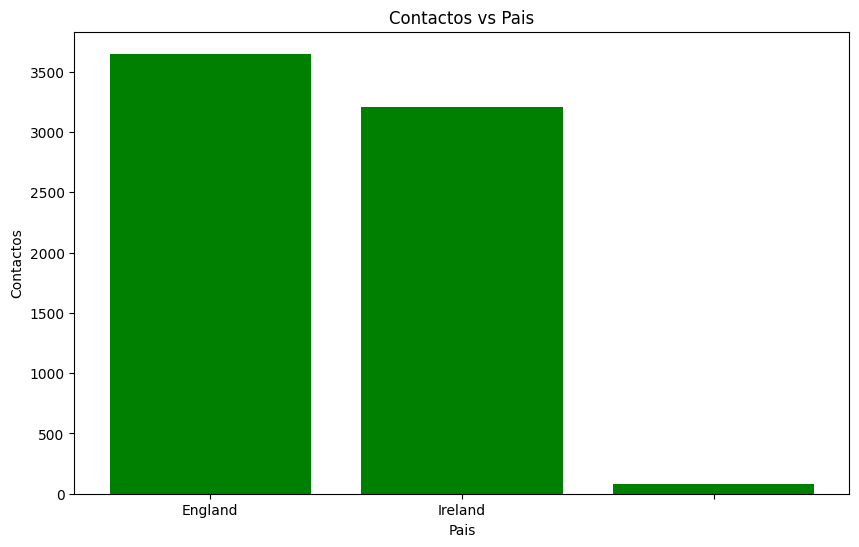

In [14]:
plt.figure(figsize=(10,6))
plt.bar(infopais['pais'], infopais['count'], color='green')

plt.xlabel('Pais')
plt.ylabel('Contactos')
plt.title('Contactos vs Pais')
plt.show()

    Gráfica que muestra la cantidad de personas vs la ciudad de residencia

In [15]:
cantidadciudad=df['ciudad'].value_counts()
infociudad=cantidadciudad.reset_index()
infociudad.columns=['ciudad','count']

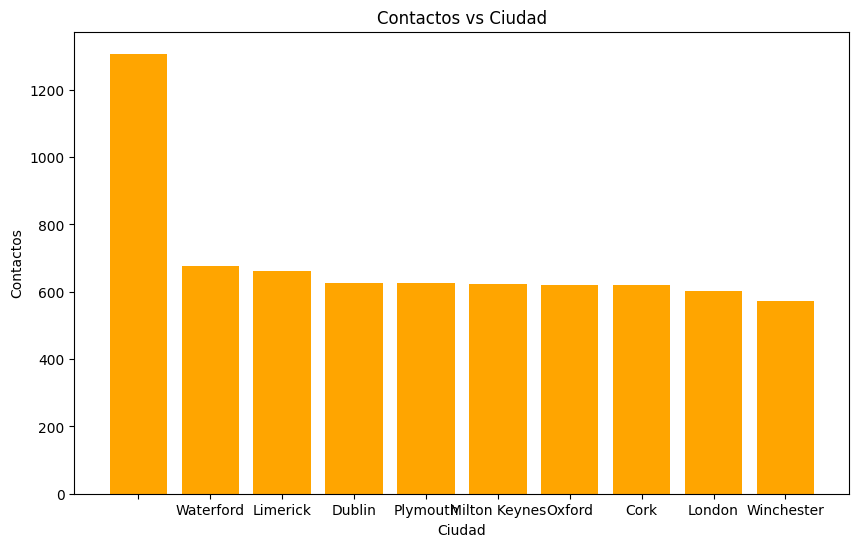

In [16]:
plt.figure(figsize=(10,6))
plt.bar(infociudad['ciudad'], infociudad['count'], color='orange')

plt.xlabel('Ciudad')
plt.ylabel('Contactos')
plt.title('Contactos vs Ciudad')
plt.show()

    Gráfica que muestra la cantidad de personas vs el dominio de email que utilizan

In [17]:
dominios=[]
for x in df['email']:
    if pd.isna(x) or x=='':
        dominios.append('')
    else:
        dominios.append(x.split('@')[1])
df['dominio']=dominios
cantidaddominios=df['dominio'].value_counts()
infodominios=cantidaddominios.reset_index()
infodominios.columns=['dominio','count']

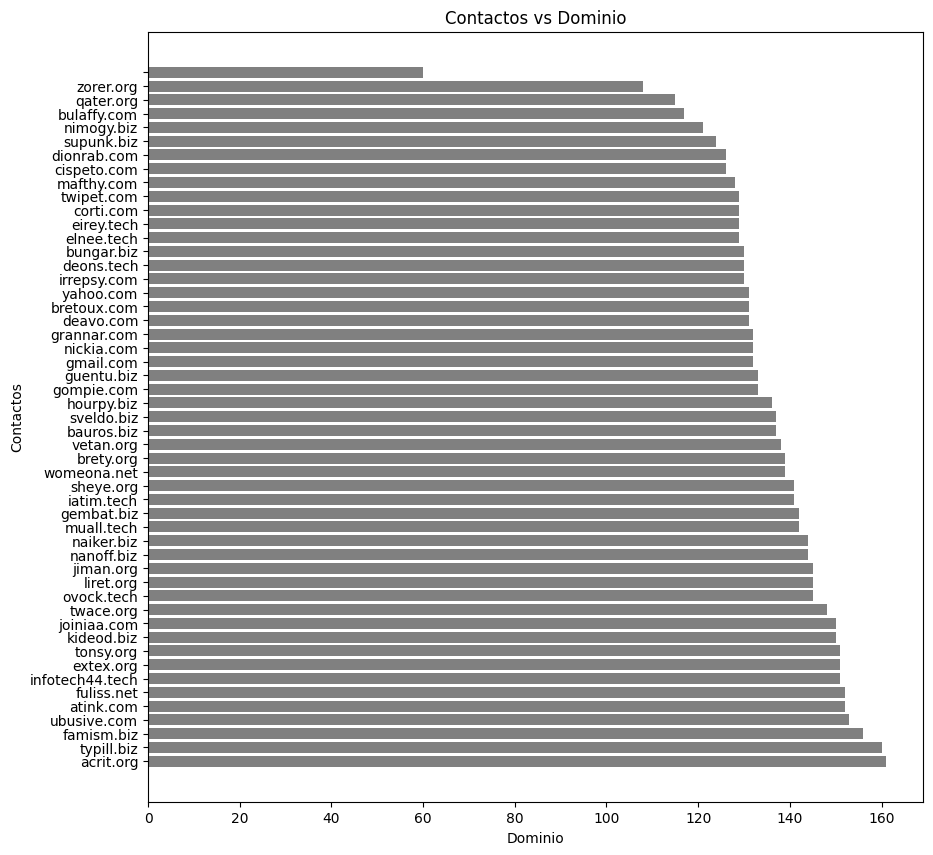

In [18]:
plt.figure(figsize=(10,10))
plt.barh(infodominios['dominio'], infodominios['count'], color='Grey')

plt.xlabel('Dominio')
plt.ylabel('Contactos')
plt.title('Contactos vs Dominio')
plt.show()

## 3. Duplicate Management
    Llamamos la función que creamos para manejar las entradas duplicadas

In [19]:
df.shape

(6936, 14)

In [20]:
dfnoduplicates=pd.DataFrame(hsl.duplicatemanagement(df))
dfnoduplicates.head()

,firstname,lastname,raw_email,country,phone,technical_test___create_date,industry,address,hs_object_id,pais,ciudad,email,telefono,dominio,full_name
0,Stacy,Antcliff,Stacy <stacy_antcliff1606128290@joiniaa.com> C...,Limerick,1-210-761-557,2022-01-01,;Meat;Bakery products,"Longleigh Way, 9891",417851,Ireland,Limerick,stacy_antcliff1606128290@joiniaa.com,(+353) 1210 761557,joiniaa.com,Stacy Antcliff
1,Jack,Reading,Jack <jack_reading467589428@acrit.org> Contact...,Milton Keynes,6-841-431-068,2022-01-01,;Dairy products;Fruit and vegetables,"Buttonwood Alley, 351",445266,England,Milton Keynes,jack_reading467589428@acrit.org,(+44) 6841 431068,acrit.org,Jack Reading
2,Stephanie,Cooper,Stephanie <stephanie_cooper932322366@hourpy.bi...,Milton Keynes,6-518-053-418,2022-01-01,Animal feeds,"Bekesbourne Avenue, 341",441004,England,Milton Keynes,stephanie_cooper932322366@hourpy.biz,(+44) 6518 053418,hourpy.biz,Stephanie Cooper
3,Vera,Payne,Vera <vera_payne1227725435@irrepsy.com> Contac...,London,4-735-376-611,2022-01-01,;Milling;Dairy products,"Udall Street, 7289",421501,England,London,vera_payne1227725435@irrepsy.com,(+44) 4735 376611,irrepsy.com,Vera Payne
4,Leroy,Murray,Leroy <leroy_murray766166302@bretoux.com> Cont...,Dublin,3-616-656-360,2021-12-31,;Animal feeds;Milling,"Jackson Hill, 9011",443669,Ireland,Dublin,leroy_murray766166302@bretoux.com,(+353) 3616 656360,bretoux.com,Leroy Murray


In [21]:
dfnoduplicates.shape

(3485, 15)

Mismas Graficas pero **sin duplicados** para ver la comparativa

In [22]:
cantidadpais=dfnoduplicates['pais'].value_counts()
infopais=cantidadpais.reset_index()
infopais.columns=['pais','count']
cantidadciudad=dfnoduplicates['ciudad'].value_counts()
infociudad=cantidadciudad.reset_index()
infociudad.columns=['ciudad','count']

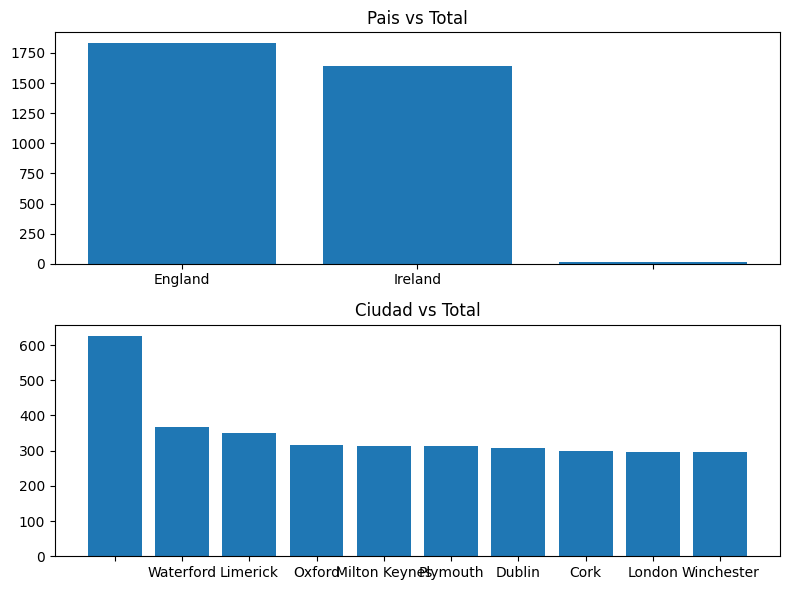

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.bar(infopais['pais'], infopais['count'])
ax1.set_title('Pais vs Total')

ax2.bar(infociudad['ciudad'], infociudad['count'])
ax2.set_title('Ciudad vs Total')

plt.tight_layout()
plt.show()

Podemos observar que bajaron los totales en paises de un máximo 3500 a 1750 y en ciudades vemos que bajo casi 200 personas

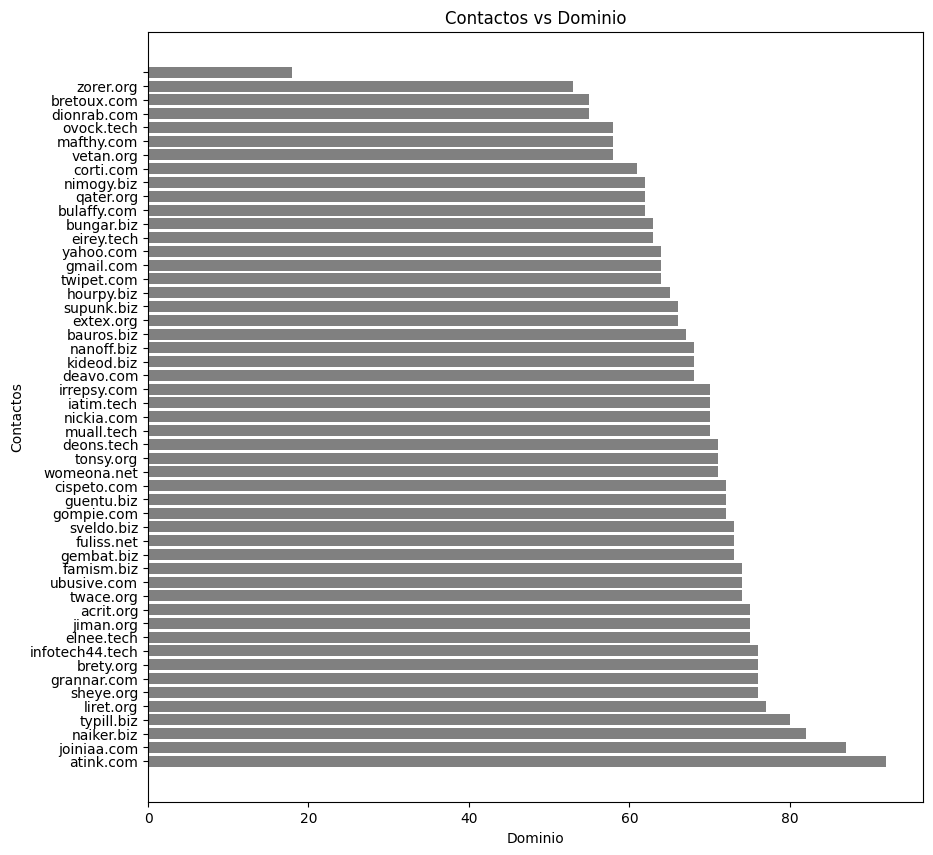

In [24]:
cantidaddominios=dfnoduplicates['dominio'].value_counts()
infodominios=cantidaddominios.reset_index()
infodominios.columns=['dominio','count']

plt.figure(figsize=(10,10))
plt.barh(infodominios['dominio'], infodominios['count'], color='Grey')

plt.xlabel('Dominio')
plt.ylabel('Contactos')
plt.title('Contactos vs Dominio')
plt.show()

Los dominios bajaron considerablemente por la mitad, el dominio atink.com sobresale paso del 5to al 1ero y acrit.org paso de ser el 1ero al 12vo

## Load Functions:
    Cargamos la información que procesamos en HubSpot con la API KEY que creamos en la aplicación de HubSpot

In [25]:
hsl.postcontactos2(dfnoduplicates,api_key2)

## Propose an idea of how you could store data such as “Street Address” with the associated “Technical Test - Create Date” in HubSpot for the duplicates to avoid losing this data from the duplicated records.

En la información de contacto, abriria un campo para guardar los extra de ambos en un string pero con un formato que no choque con la ',' utilizaria un '<' , aunque si estuvieramos hablando de que puedo manejarla como una base de datos, haria una tabla con el id y la “Street Address” y el “Technical Test - Create Date”

### What is your usual IDE?
    Visual Studio Code (VS Code) & Jupyter Notebook
### What are the advantages of this IDE over the others?
    Visual Studio Code tiene una ventaja gigante en cuanto a la cantidad de extensiones que tiene y el rango de lenguajes de programación que puedo usar y Jupyter Notebook es el IDE diseñado específicamente para Ciencia de Datos, ya que permite ir documentando mi progreso mientras programo, el estilo que tiene combina texto con bloques de código y sus respectivos outputs, a parte que puedo exportarlo en PDF, esto sin tener en cuenta que al tener sus bases en Python cuento con muchas librerias, incluyendo las desarrolladas para Ciencia de Datos
### Which of the items resulted in the most computational time for you? Add time in seconds.
    Las dos cosas que mas costaron computacionalmente fueron: a nivel de request fueron la obtencion de los datos porque no podia traer toda la información, sino que tenia que hacerlo por lotes (80 seg) y cuando la subí ya que máximo podia subir en lotes de 100 (75 seg) y sin request como tal fue el manejo de duplicados (2 seg)
### Please share the link with us if you have any public portfolio
    No tengo uno